In [5]:
#Import important libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [6]:
#Read The DataFrame

df = pd.read_csv('02-14-2018.csv')

In [7]:
#Display The DataFrame

df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632086e+07,1.393000e+02,56320958,56320761,112641719,5.632086e+07,1.393000e+02,56320958,56320761,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632073e+07,1.145513e+02,56320814,56320652,112641466,5.632073e+07,1.145513e+02,56320814,56320652,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026634,5.631931e+07,3.019346e+02,56319525,56319098,112638623,5.631931e+07,3.019346e+02,56319525,56319098,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026634,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,0,227.300000,371.677892,544.161528,3.873587,2.689152e+05,2.474438e+05,673900,22,6453966,4.609976e+05,1.231094e+05,673900,229740,5637902,6.264336e+05,4.550822e+05,1167293,554,0,0,0,0,488,328,2.324152,1.549435,0,976,135.076923,277.834760,77192.153846,0,0,0,1,0,0,0,0,0,140.48,82.600000,227.300000,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,0,200.818182,362.249864,380.733175,2.839597,3.668361e+05,5.113566e+05,1928102,21,8804066,6.772358e+05,5.324170e+05,1928102,246924,7715481,7.715481e+05,7.555431e+05,2174893,90,0,0,0,0,456,360,1.590174,1.249423,0,976,128.923077,279.763032,78267.353846,0,0,0,1,0,0,0,0,0,134.08,81.642857,200.818182,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,217.800000,299.745225,1334,0,384.600000,588.831725,296.544664,0.984544,1.128554e+06,3.290455e+06,9902474,17,254512,6.362800e+04,6.417719e+04,123760,486,10140598,2.535150e+06,4.976408e+06,9999381,6350,0,0,0,0,112,104,0.492272,0.492272,0,1334,273.818182,435.695953,189830.963636,0,0,0,1,0,0,0,0,1,301.20,217.800000,384.600000,0,0,0,0,0,

In [8]:
#Copy from the DataFrame

df_copy = df.copy()
df_copy

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632086e+07,1.393000e+02,56320958,56320761,112641719,5.632086e+07,1.393000e+02,56320958,56320761,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632073e+07,1.145513e+02,56320814,56320652,112641466,5.632073e+07,1.145513e+02,56320814,56320652,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026634,5.631931e+07,3.019346e+02,56319525,56319098,112638623,5.631931e+07,3.019346e+02,56319525,56319098,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026634,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,0,227.300000,371.677892,544.161528,3.873587,2.689152e+05,2.474438e+05,673900,22,6453966,4.609976e+05,1.231094e+05,673900,229740,5637902,6.264336e+05,4.550822e+05,1167293,554,0,0,0,0,488,328,2.324152,1.549435,0,976,135.076923,277.834760,77192.153846,0,0,0,1,0,0,0,0,0,140.48,82.600000,227.300000,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,0,200.818182,362.249864,380.733175,2.839597,3.668361e+05,5.113566e+05,1928102,21,8804066,6.772358e+05,5.324170e+05,1928102,246924,7715481,7.715481e+05,7.555431e+05,2174893,90,0,0,0,0,456,360,1.590174,1.249423,0,976,128.923077,279.763032,78267.353846,0,0,0,1,0,0,0,0,0,134.08,81.642857,200.818182,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,217.800000,299.745225,1334,0,384.600000,588.831725,296.544664,0.984544,1.128554e+06,3.290455e+06,9902474,17,254512,6.362800e+04,6.417719e+04,123760,486,10140598,2.535150e+06,4.976408e+06,9999381,6350,0,0,0,0,112,104,0.492272,0.492272,0,1334,273.818182,435.695953,189830.963636,0,0,0,1,0,0,0,0,1,301.20,217.800000,384.600000,0,0,0,0,0,

In [9]:
#Display First five rows

df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632086e+07,139.300036,56320958,56320761,112641719,5.632086e+07,139.300036,56320958,56320761,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632073e+07,114.551299,56320814,56320652,112641466,5.632073e+07,114.551299,56320814,56320652,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026634,5.631931e+07,301.934596,56319525,56319098,112638623,5.631931e+07,301.934596,56319525,56319098,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.026634,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,0,227.300000,371.677892,544.161528,3.873587,2.689152e+05,247443.778966,673900,22,6453966,4.609976e+05,123109.423588,673900,229740,5637902,626433.555556,455082.214224,1167293,554,0,0,0,0,488,328,2.324152,1.549435,0,976,135.076923,277.834760,77192.153846,0,0,0,1,0,0,0,0,0,140.48,82.600000,227.300000,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,0,200.818182,362.249864,380.733175,2.839597,3.668361e+05,511356.609733,1928102,21,8804066,6.772358e+05,532416.970959,1928102,246924,7715481,771548.100000,755543.082717,2174893,90,0,0,0,0,456,360,1.590174,1.249423,0,976,128.923077,279.763032,78267.353846,0,0,0,1,0,0,0,0,0,134.08,81.642857,200.818182,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [10]:
#Checking the data

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [11]:
#Detecting Missing Values "Boolean True/False for each element"

df.isna() 

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [12]:
#Checking the missing values
NaN_Values = df.isna().sum()
NaN_Values

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

In [13]:
#Remove 2 columns with NaN values
df.drop('Flow Byts/s' , axis=1 , inplace=True)
df.drop('Flow Pkts/s' , axis=1 , inplace=True)

In [14]:
print(df.columns)

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Av

In [15]:
df.shape

(1048575, 78)

In [16]:
#Checking the dublicates on the dataframe
df.duplicated().sum()

225628

In [17]:
df.shape

(1048575, 78)

In [18]:
#Remove dublicates from the dataframe

df.drop_duplicates(subset=None , keep='first', inplace=True)

In [19]:
df.shape

(822947, 78)

In [20]:
#Remove Timestamp columns
df.drop('Timestamp' , axis=1 , inplace=True)

In [21]:
#Divide The Dataset into features & lable

x = df.drop(columns='Label')
y = df.Label

In [22]:
#Display Correlation among the columns 

corr_df = x.corr(method='pearson')

In [23]:
corr_df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Dst Port,1.000000,-0.202655,-0.001697,-0.039387,-0.024921,-0.009621,-0.012106,-0.205624,-0.177340,-0.240438,-0.180859,-0.253811,-0.192420,-0.230461,-0.218267,-0.001220,-0.001181,-0.001529,0.000561,-0.001604,-0.001454,-0.001208,-0.001471,0.000551,-0.102459,-0.080554,-0.090782,-0.086187,-0.017426,0.174343,NaN,NaN,NaN,-0.043260,-0.030221,0.225254,-0.036482,-0.187180,-0.244959,-0.227066,-0.232289,-0.092149,0.101437,0.174343,-0.040406,-0.313759,0.573972,0.371135,NaN,-0.040414,-0.157625,-0.248993,-0.240438,-0.230461,NaN,NaN,NaN,NaN,NaN,NaN,-0.039387,-0.009621,-0.024921,-0.012106,-0.109766,-0.042684,-0.188173,0.024604,-0.012843,-0.038765,-0.030124,-0.005269,-0.001950,-0.000773,-0.001168,-0.035799
Protocol,-0.202655,1.000000,-0.001422,-0.071419,-0.035996,-0.016018,-0.018136,-0.319890,0.839669,-0.059431,-0.384538,-0.336224,0.850014,-0.043245,-0.391264,-0.002996,-0.004419,-0.005037,0.002927,-0.001273,-0.003322,-0.004465,-0.004948,0.002917,-0.159383,-0.123221,-0.141169,-0.135622,-0.026368,-0.103049,NaN,NaN,NaN,-0.080717,-0.047339,-0.103839,-0.108356,0.867321,-0.335115,-0.076717,-0.301291,-0.157365,-0.037216,-0.103049,-0.126875,-0.531230,-0.316701,-0.149830,NaN,-0.126873,0.377862,0.018265,-0.059431,-0.043245,NaN,NaN,NaN,NaN,NaN,NaN,-0.071419,-0.016018,-0.035996,-0.018136,-0.375364,-0.213035,-0.300379,-0.677461,-0.053187,-0.064624,-0.073894,-0.041386,-0.006798,-0.003511,-0.004615,-0.101693
Flow Duration,-0.001697,-0.001422,1.000000,-0.004514,0.002075,0.000276,0.001668,0.004462,-0.002425,0.002254,0.004632,0.007616,-0.002677,0.007933,0.007842,0.553623,-0.889712,-0.670336,0.886285,0.999997,0.553659,-0.889702,-0.670340,0.886286,0.018092,0.011955,0.013648,0.013552,0.002220,0.000141,NaN,NaN,NaN,0.002232,0.002142,-0.001096,-0.001165,-0.002495,0.007670,0.007857,0.008689,0.005548,-0.000372,0.000141,-0.000676,0.004952,0.000457,-0.001434,NaN,-0.000676,0.000263,0.007404,0.002254,0.007933,NaN,NaN,NaN,NaN,NaN,NaN,-0.004514,0.000276,0.002075,0.001668,0.000672,-0.000668,0.006278,0.003057,0.003623,0.007044,0.006570,0.002297,-0.741638,-0.733111,-0.727980,-0.672193
Tot Fwd Pkts,-0.039387,-0.071419,-0.004514,1.000000,0.884620,0.058497,0.876916,0.145987,-0.063392,0.069405,0.100982,0.161863,-0.050207,0.245528,0.100837,-0.000516,0.010345,0.011635,-0.010448,-0.004667,-0.000394,0.010410,0.011522,-0.010450,0.139522,0.024025,0.044783,0.109212,-0.003344,0.025841,NaN,NaN,NaN,0.986734,0.886954,-0.023489,-0.027371,-0.065093,0.166196,0.270958,0.183397,0.144355,-0.008051,0.025841,0.007394,0.103200,-0.042555,-0.035676,NaN,0.007395,0.029955,0.255046,0.069405,0.245528,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.058497,0.884620,0.876916,0.073076,0.011967,0.247404,0.069493,0.087864,0.094685,0.119456,0.069989,0.012485,0.011327,0.011746,0.044952
Tot Bwd Pkts,-0.024921,-0.035996,0.002075,0.884620,1.000000,0.060777,0.996948,0.085757,-0.032784,0.032500,0.051480,0.104056,-0.019590,0.234452,0.048280,-0.000308,-0.000105,0.000308,0.000079,0.001844,-0.000248,-0.000062,

In [24]:
col_corr = set() # Set of all the names of deleted columns
for i in range(len(corr_df.columns)):
    for j in range(i):
        if (corr_df.iloc[i, j] >= 0.7) and (corr_df.columns[j] not in col_corr):
            colname = corr_df.columns[i] # getting the name of column
            col_corr.add(colname)
col_corr = list(col_corr)
print(col_corr)

# dropping identified columns from the dataset


df.drop(col_corr, axis=1, inplace=True)

['ECE Flag Cnt', 'Idle Std', 'Fwd Pkt Len Mean', 'SYN Flag Cnt', 'Fwd Header Len', 'Flow IAT Max', 'Bwd IAT Min', 'Bwd Header Len', 'Bwd IAT Std', 'Fwd IAT Min', 'Pkt Len Min', 'Bwd Seg Size Avg', 'Fwd IAT Max', 'Subflow Fwd Pkts', 'Bwd Pkt Len Min', 'Fwd Act Data Pkts', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Fwd IAT Std', 'Subflow Bwd Byts', 'Idle Mean', 'Bwd IAT Max', 'TotLen Bwd Pkts', 'Idle Max', 'Tot Bwd Pkts', 'Fwd IAT Mean', 'Fwd Pkt Len Min', 'Active Max', 'Bwd Pkt Len Max', 'Flow IAT Min', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Active Min', 'Fwd IAT Tot', 'Idle Min', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std']


In [25]:
df.shape

(822947, 37)

In [26]:
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Bwd IAT Tot,Bwd IAT Mean,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Var,FIN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,Down/Up Ratio,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Label
0,0,0,112641719,3,0,0,0.000000,5.632086e+07,1.393000e+02,0,0.000000e+00,0,0,0,0,0.026633,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0.0,0.0,Benign
1,0,0,112641466,3,0,0,0.000000,5.632073e+07,1.145513e+02,0,0.000000e+00,0,0,0,0,0.026633,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0.0,0.0,Benign
2,0,0,112638623,3,0,0,0.000000,5.631931e+07,3.019346e+02,0,0.000000e+00,0,0,0,0,0.026634,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0.0,0.0,Benign
3,22,6,6453966,15,1239,744,227.300000,2.689152e+05,2.474438e+05,5637902,6.264336e+05,0,0,0,0,2.324152,1.549435,77192.153846,0,0,1,0,0,0,0,0,0,0,0,0,0,65535,233,32,0.0,0.0,Benign
4,22,6,8804066,14,1143,744,200.818182,3.668361e+05,5.113566e+05,7715481,7.715481e+05,0,0,0,0,1.590174,1.249423,78267.353846,0,0,1,0,0,0,0,0,0,0,0,0,0,5808,233,32,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,10156986,5,1089,587,384.600000,1.128554e+06,3.290455e+06,10140598,2.535150e+06,0,0,0,0,0.492272,0.492272,189830.963636,0,0,1,0,0,0,1,0,0,0,0,0,0,8192,31111,20,0.0,0.0,Benign
1048571,80,6,117,2,0,0,0.000000,1.170000e+02,0.000000e+00,0,0.000000e+00,0,0,0,0,17094.017094,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,64240,-1,20,0.0,0.0,Benign
1048572,80,6,5095331,3,0,0,0.000000,1.698444e+06,2.911789e+06,0,0.000000e+00,0,0,0,0,0.588774,0.196258,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,8192,29200,20,0.0,0.0,Benign
1048573,80,6,5235511,3,0,0,0.000000,1.745170e+06,2.939912e+06,0,0.000000e+00,0,0,0,0,0.573010,0.191003,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,8192,42780,20,0.0,0.0,Benign


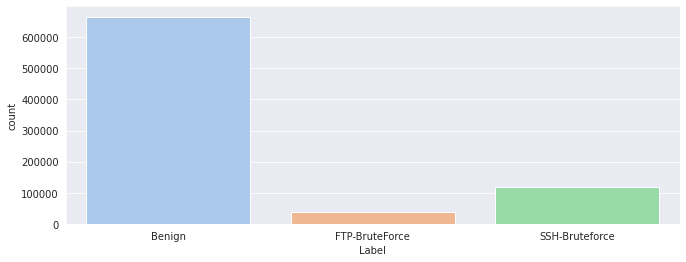

In [39]:
sns.set_style('darkgrid')
sns.countplot( x = 'Label' , data = df , palette = 'pastel')

In [27]:
#Divide The Dataset into features & lable

x = df.drop(columns='Label')
y = df.Label

In [28]:
x

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Bwd IAT Tot,Bwd IAT Mean,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Var,FIN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,Down/Up Ratio,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std
0,0,0,112641719,3,0,0,0.000000,5.632086e+07,1.393000e+02,0,0.000000e+00,0,0,0,0,0.026633,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0.0,0.0
1,0,0,112641466,3,0,0,0.000000,5.632073e+07,1.145513e+02,0,0.000000e+00,0,0,0,0,0.026633,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0.0,0.0
2,0,0,112638623,3,0,0,0.000000,5.631931e+07,3.019346e+02,0,0.000000e+00,0,0,0,0,0.026634,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0.0,0.0
3,22,6,6453966,15,1239,744,227.300000,2.689152e+05,2.474438e+05,5637902,6.264336e+05,0,0,0,0,2.324152,1.549435,77192.153846,0,0,1,0,0,0,0,0,0,0,0,0,0,65535,233,32,0.0,0.0
4,22,6,8804066,14,1143,744,200.818182,3.668361e+05,5.113566e+05,7715481,7.715481e+05,0,0,0,0,1.590174,1.249423,78267.353846,0,0,1,0,0,0,0,0,0,0,0,0,0,5808,233,32,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,10156986,5,1089,587,384.600000,1.128554e+06,3.290455e+06,10140598,2.535150e+06,0,0,0,0,0.492272,0.492272,189830.963636,0,0,1,0,0,0,1,0,0,0,0,0,0,8192,31111,20,0.0,0.0
1048571,80,6,117,2,0,0,0.000000,1.170000e+02,0.000000e+00,0,0.000000e+00,0,0,0,0,17094.017094,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,64240,-1,20,0.0,0.0
1048572,80,6,5095331,3,0,0,0.000000,1.698444e+06,2.911789e+06,0,0.000000e+00,0,0,0,0,0.588774,0.196258,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,8192,29200,20,0.0,0.0
1048573,80,6,5235511,3,0,0,0.000000,1.745170e+06,2.939912e+06,0,0.000000e+00,0,0,0,0,0.573010,0.191003,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,8192,42780,20,0.0,0.0


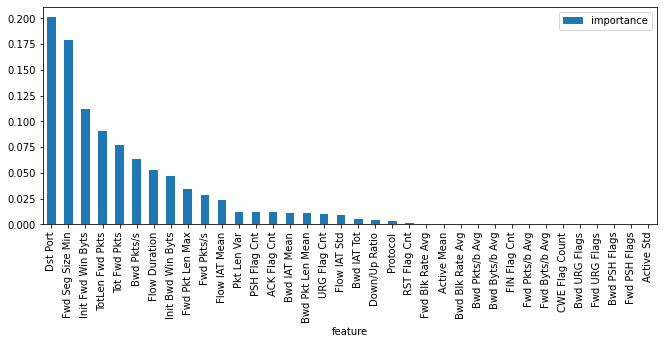

In [29]:
#Feature Selection
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(x, y);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();


In [30]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

# create the RFE model and select 20 attributes
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(x, y.values.ravel())

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x.columns)]
selected_features = [v for i, v in feature_map if i==True]


In [31]:
selected_features

['Dst Port',
 'Flow Duration',
 'Tot Fwd Pkts',
 'TotLen Fwd Pkts',
 'Fwd Pkt Len Max',
 'Bwd Pkt Len Mean',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Var',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'Down/Up Ratio',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Seg Size Min']

In [32]:
a = [i[0] for i in feature_map]

new_x = x.iloc[:,a]
new_x

,Dst Port,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Bwd IAT Tot,Bwd IAT Mean,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Var,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min
0,0,112641719,3,0,0,0.000000,5.632086e+07,1.393000e+02,0,0.000000e+00,0.026633,0.000000,0.000000,0,0,0,0,-1,-1,0
1,0,112641466,3,0,0,0.000000,5.632073e+07,1.145513e+02,0,0.000000e+00,0.026633,0.000000,0.000000,0,0,0,0,-1,-1,0
2,0,112638623,3,0,0,0.000000,5.631931e+07,3.019346e+02,0,0.000000e+00,0.026634,0.000000,0.000000,0,0,0,0,-1,-1,0
3,22,6453966,15,1239,744,227.300000,2.689152e+05,2.474438e+05,5637902,6.264336e+05,2.324152,1.549435,77192.153846,1,0,0,0,65535,233,32
4,22,8804066,14,1143,744,200.818182,3.668361e+05,5.113566e+05,7715481,7.715481e+05,1.590174,1.249423,78267.353846,1,0,0,0,5808,233,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,10156986,5,1089,587,384.600000,1.128554e+06,3.290455e+06,10140598,2.535150e+06,0.492272,0.492272,189830.963636,1,0,0,1,8192,31111,20
1048571,80,117,2,0,0,0.000000,1.170000e+02,0.000000e+00,0,0.000000e+00,17094.017094,0.000000,0.000000,0,1,0,0,64240,-1,20
1048572,80,5095331,3,0,0,0.000000,1.698444e+06,2.911789e+06,0,0.000000e+00,0.588774,0.196258,0.000000,1,0,0,0,8192,29200,20
1048573,80,5235511,3,0,0,0.000000,1.745170e+06,2.939912e+06,0,0.000000e+00,0.573010,0.191003,0.000000,1,0,0,0,8192,42780,20


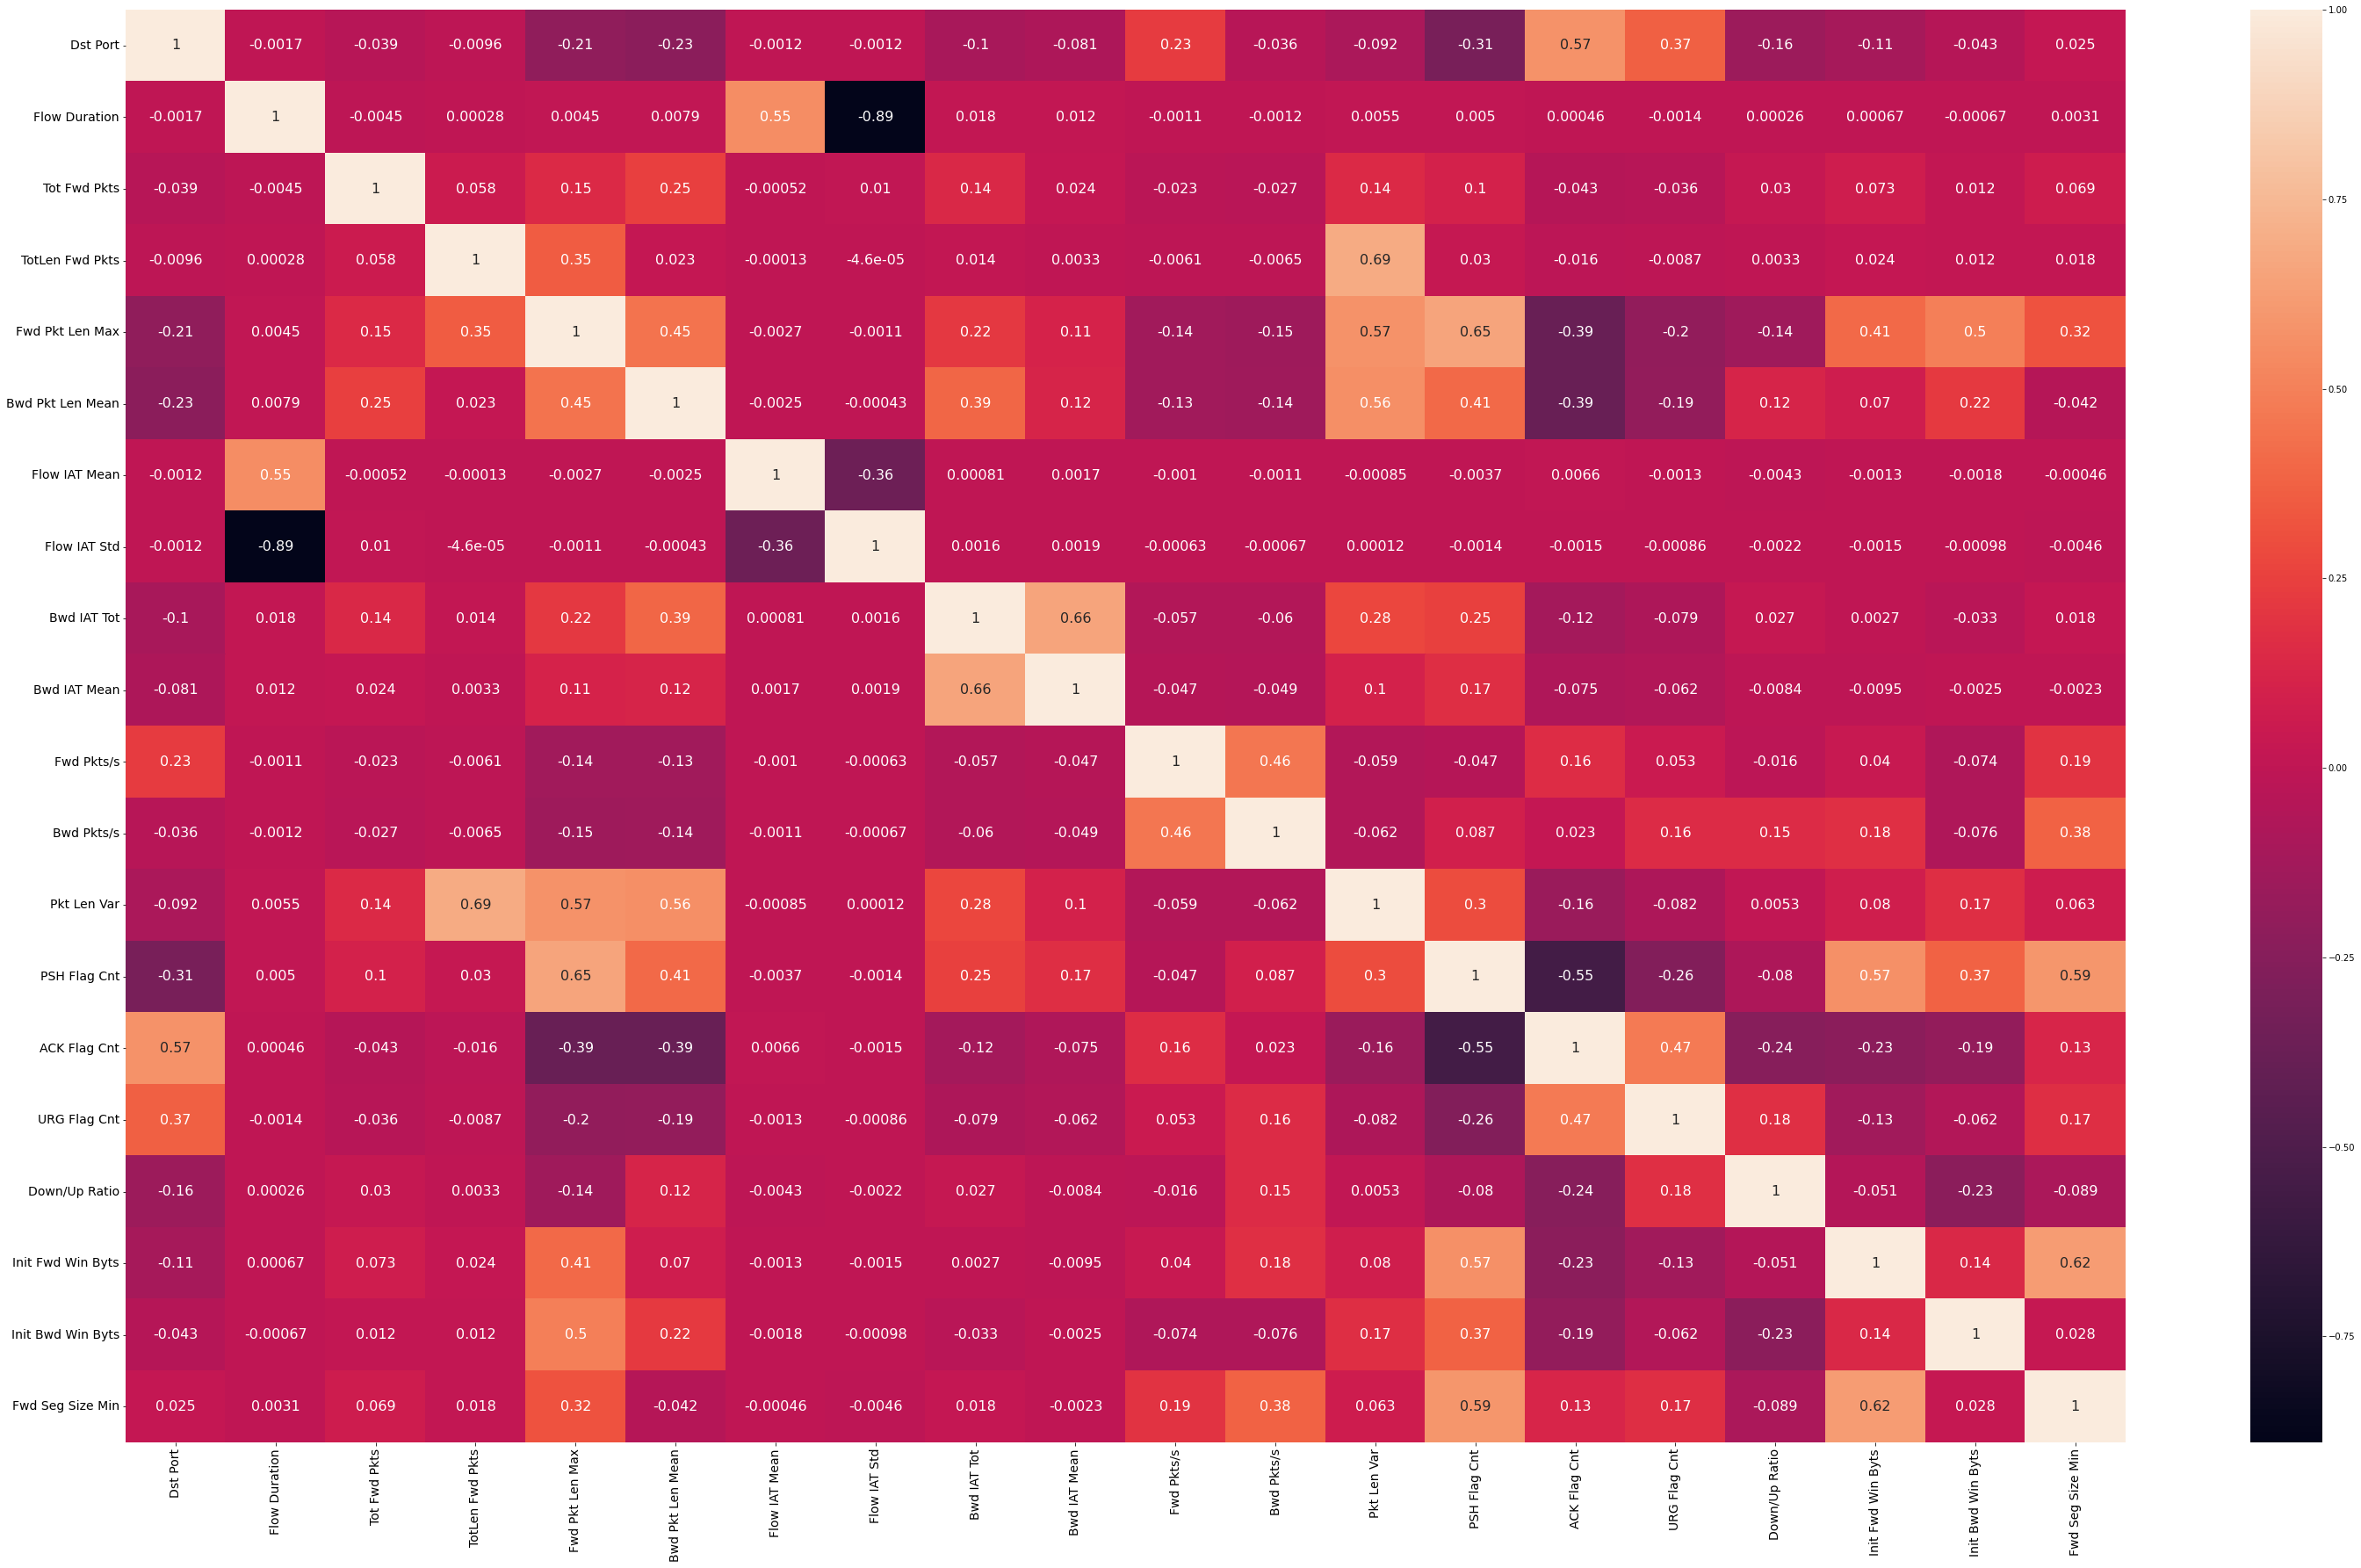

In [33]:
import seaborn as sns

corr = new_x.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={"size":16})
heat_map= plt.gcf()
heat_map.set_size_inches(51,30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [34]:
new_df = pd.concat([new_x, y], axis=1)
new_df

,Dst Port,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Bwd IAT Tot,Bwd IAT Mean,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Var,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
0,0,112641719,3,0,0,0.000000,5.632086e+07,1.393000e+02,0,0.000000e+00,0.026633,0.000000,0.000000,0,0,0,0,-1,-1,0,Benign
1,0,112641466,3,0,0,0.000000,5.632073e+07,1.145513e+02,0,0.000000e+00,0.026633,0.000000,0.000000,0,0,0,0,-1,-1,0,Benign
2,0,112638623,3,0,0,0.000000,5.631931e+07,3.019346e+02,0,0.000000e+00,0.026634,0.000000,0.000000,0,0,0,0,-1,-1,0,Benign
3,22,6453966,15,1239,744,227.300000,2.689152e+05,2.474438e+05,5637902,6.264336e+05,2.324152,1.549435,77192.153846,1,0,0,0,65535,233,32,Benign
4,22,8804066,14,1143,744,200.818182,3.668361e+05,5.113566e+05,7715481,7.715481e+05,1.590174,1.249423,78267.353846,1,0,0,0,5808,233,32,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,10156986,5,1089,587,384.600000,1.128554e+06,3.290455e+06,10140598,2.535150e+06,0.492272,0.492272,189830.963636,1,0,0,1,8192,31111,20,Benign
1048571,80,117,2,0,0,0.000000,1.170000e+02,0.000000e+00,0,0.000000e+00,17094.017094,0.000000,0.000000,0,1,0,0,64240,-1,20,Benign
1048572,80,5095331,3,0,0,0.000000,1.698444e+06,2.911789e+06,0,0.000000e+00,0.588774,0.196258,0.000000,1,0,0,0,8192,29200,20,Benign
1048573,80,5235511,3,0,0,0.000000,1.745170e+06,2.939912e+06,0,0.000000e+00,0.573010,0.191003,0.000000,1,0,0,0,8192,42780,20,Benign


In [35]:
new_df.describe()

,Dst Port,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Mean,Flow IAT Mean,Flow IAT Std,Bwd IAT Tot,Bwd IAT Mean,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Var,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min
count,822947.000000,8.229470e+05,822947.000000,8.229470e+05,822947.000000,822947.000000,8.229470e+05,8.229470e+05,8.229470e+05,8.229470e+05,8.229470e+05,8.229470e+05,8.229470e+05,822947.000000,822947.000000,822947.000000,822947.000000,822947.000000,822947.000000,822947.000000
mean,6207.000383,7.970644e+06,7.632546,5.708171e+02,222.433293,118.187800,2.018219e+06,2.677666e+06,7.332652e+06,6.113612e+05,4.180159e+04,2.205860e+04,3.940866e+04,0.482319,0.248762,0.069001,0.572760,8327.640672,7806.698371,19.411918
std,16048.884277,1.422602e+09,50.112776,1.776003e+04,307.893592,169.714377,3.761661e+08,8.277351e+08,2.525941e+07,2.570740e+06,2.137625e+05,1.060589e+05,1.308769e+05,0.499688,0.432296,0.253456,0.606099,12211.485956,20170.621606,9.061189
min,0.000000,-9.190110e+11,1.000000,0.000000e+00,0.000000,0.000000,-3.407010e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,53.000000,3.090000e+02,1.000000,0.000000e+00,0.000000,0.000000,1.805000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.175873e+00,3.300818e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,8.000000
50%,80.000000,4.765900e+04,2.000000,5.400000e+01,45.000000,85.000000,8.526289e+03,1.154677e+02,0.000000e+00,0.000000e+00,6.412603e+01,3.872592e+01,1.825200e+03,0.000000,0.000000,0.000000,1.000000,2150.000000,0.000000,20.000000
75%,445.000000,1.732018e+06,9.000000,1.128000e+03,559.000000,134.000000,1.480203e+05,1.429064e+05,3.993745e+05,5.272800e+04,3.773585e+03,1.054852e+03,4.151166e+04,1.000000,0.000000,0.000000,1.000000,8192.000000,230.000000,20.000000
max,65533.000000,1.200000e+08,5115.000000,8.591554e+06,64440.000000,1459.240495,1.199907e+08,4.244739e+11,1.199997e+08,1.194003e+08,4.000000e+06,2.000000e+06,7.762964e+07,1.000000,1.000000,1.000000,80.000000,65535.000000,65535.000000,48.000000
